### En este notebook vamos a limpiar el dataset obtenido en a partir del Web Scraping y a darles un formato a los datos obtenidos de los CSV del INE

Importamos librerias:

In [145]:
import pandas as pd
import numpy as np

Creamos unos diccionarios que nos serán útiles para tratar los distintos dataset

In [146]:
diccionario_comunidades =     {
    "andalucia": "Andalucia",
    "aragon": "Aragon",
    "asturias": "Principado de Asturias",
    "baleares": "Islas Baleares",
    "canarias": "Canarias",
    "cantabria": "Cantabria",
    "castilla-y-leon": "Castilla y Leon",
    "castilla-la-mancha": "Castilla-La Mancha",
    "cataluna": "Cataluna",
    "extremadura": "Extremadura",
    "galicia": "Galicia",
    "madrid-comunidad": "Comunidad de Madrid",
    "murcia-region": "Region de Murcia",
    "navarra": "Navarra",
    "la-rioja": "La Rioja",
    "euskadi": "Pais Vasco",
    "comunitat-valenciana": "Comunidad Valenciana",
    "ceuta": "Ceuta",
    "melilla": "Melilla"
}

diccionario_provincias = {
    "almeria-provincia": "Almeria",
    "cadiz-provincia": "Cadiz",
    "cordoba-provincia": "Cordoba",
    "granada-provincia": "Granada",
    "huelva-provincia": "Huelva",
    "jaen-provincia": "Jaen",
    "malaga-provincia": "Malaga",
    "sevilla-provincia": "Sevilla",
    "huesca-provincia": "Huesca",
    "teruel-provincia": "Teruel",
    "zaragoza-provincia": "Zaragoza",
    "asturias": "Asturias",
    "baleares": "Islas Baleares",
    "las-palmas": "Las Palmas",
    "santa-cruz-de-tenerife-provincia": "Santa Cruz de Tenerife",
    "cantabria": "Cantabria",
    "avila-provincia": "Avila",
    "burgos-provincia": "Burgos",
    "leon-provincia": "Leon",
    "palencia-provincia": "Palencia",
    "salamanca-provincia": "Salamanca",
    "segovia-provincia": "Segovia",
    "soria-provincia": "Soria",
    "valladolid-provincia": "Valladolid",
    "zamora-provincia": "Zamora",
    "albacete-provincia": "Albacete",
    "ciudad-real-provincia": "Ciudad Real",
    "cuenca-provincia": "Cuenca",
    "guadalajara-provincia": "Guadalajara",
    "toledo-provincia": "Toledo",
    "barcelona-provincia": "Barcelona",
    "girona-provincia": "Girona",
    "lleida-provincia": "Lleida",
    "tarragona-provincia": "Tarragona",
    "badajoz-provincia": "Badajoz",
    "caceres-provincia": "Caceres",
    "a-coruna-provincia": "A Coruna",
    "lugo-provincia": "Lugo",
    "ourense-provincia": "Ourense",
    "pontevedra-provincia": "Pontevedra",
    "madrid-provincia": "Madrid",
    "murcia-provincia": "Murcia",
    "navarra": "Navarra",
    "la-rioja": "La Rioja",
    "alava": "Alava",
    "guipuzcoa": "Guipuzcoa",
    "vizcaya": "Vizcaya",
    "alicante-alacant": "Alicante",
    "castellon-castello": "Castellon",
    "valencia-valencia": "Valencia",
    "ceuta-provincia": "Ceuta",
    "melilla-provincia": "Melilla"
}

diccionario_provincias_por_comunidad =     {
    "Andalucia": ["Almeria", "Cadiz", "Cordoba", "Granada", "Huelva", "Jaen", "Malaga", "Sevilla"],
    "Aragon": ["Huesca", "Teruel", "Zaragoza"],
    "Principado de Asturias": ["Asturias"],
    "Islas Baleares": ["Islas Baleares"],
    "Canarias": ["Las Palmas", "Santa Cruz de Tenerife"],
    "Cantabria": ["Cantabria"],
    "Castilla y Leon": ["Avila", "Burgos", "Leon", "Palencia", "Salamanca", "Segovia", "Soria", "Valladolid", "Zamora"],
    "Castilla-La Mancha": ["Albacete", "Ciudad Real", "Cuenca", "Guadalajara", "Toledo"],
    "Cataluna": ["Barcelona", "Girona", "Lleida", "Tarragona"],
    "Extremadura": ["Badajoz", "Caceres"],
    "Galicia": ["A Coruna", "Lugo", "Ourense", "Pontevedra"],
    "Comunidad de Madrid": ["Madrid"],
    "Region de Murcia": ["Murcia"],
    "Navarra": ["Navarra"],
    "La Rioja": ["La Rioja"],
    "Pais Vasco": ["Alava", "Guipuzcoa", "Vizcaya"],
    "Valencia": ["Alicante", "Castellon", "Valencia"],
    "Ceuta": ["Ceuta"],
    "Melilla": ["Melilla"]
}

### DF Ventas y Alquiler (Idealista)

In [147]:
df_venta = pd.read_csv("./data/datasets_brutos/csv_idealista_venta.csv", sep=";" ,header=0, index_col=0)
df_alquiler = pd.read_csv("./data/datasets_brutos/csv_idealista_alquiler.csv", sep=";" ,header=0, index_col=0)
df_venta 

,Comunidad,Provincia,Fecha,Precio
0,andalucia,almeria-provincia,Noviembre 2024,1.297 €/m2
1,andalucia,almeria-provincia,Octubre 2024,1.296 €/m2
2,andalucia,almeria-provincia,Septiembre 2024,1.279 €/m2
3,andalucia,almeria-provincia,Agosto 2024,1.273 €/m2
4,andalucia,almeria-provincia,Julio 2024,1.262 €/m2
...,...,...,...,...
11799,melilla,melilla-provincia,Mayo 2006,n.d.
11800,melilla,melilla-provincia,Abril 2006,n.d.
11801,melilla,melilla-provincia,Marzo 2006,n.d.
11802,melilla,melilla-provincia,Febrero 2006,n.d.


Creamos una función para corregir el nombre de Provincias y Comunidades para crear uno uniforme en todos los DataSet

In [148]:
def correccion_comunidad_provincia (columna, diccionario):
    for index in columna.index:
        columna.loc[index] = diccionario[columna.loc[index]]

In [149]:
correccion_comunidad_provincia(df_venta["Comunidad"], diccionario_comunidades)
correccion_comunidad_provincia(df_venta["Provincia"], diccionario_provincias)

correccion_comunidad_provincia(df_alquiler["Comunidad"], diccionario_comunidades)
correccion_comunidad_provincia(df_alquiler["Provincia"], diccionario_provincias)

df_venta

,Comunidad,Provincia,Fecha,Precio
0,Andalucia,Almeria,Noviembre 2024,1.297 €/m2
1,Andalucia,Almeria,Octubre 2024,1.296 €/m2
2,Andalucia,Almeria,Septiembre 2024,1.279 €/m2
3,Andalucia,Almeria,Agosto 2024,1.273 €/m2
4,Andalucia,Almeria,Julio 2024,1.262 €/m2
...,...,...,...,...
11799,Melilla,Melilla,Mayo 2006,n.d.
11800,Melilla,Melilla,Abril 2006,n.d.
11801,Melilla,Melilla,Marzo 2006,n.d.
11802,Melilla,Melilla,Febrero 2006,n.d.


Convertimos las fechas a tipo Datetime

In [150]:
meses_espanol_a_ingles = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

df_venta['Fecha'] = df_venta['Fecha'].apply(lambda x: ' '.join([meses_espanol_a_ingles[palabra.lower()] if palabra.lower() in meses_espanol_a_ingles else palabra for palabra in x.split()]))

df_venta['Fecha'] = pd.to_datetime(df_venta['Fecha'], format='%B %Y')

df_alquiler['Fecha'] = df_alquiler['Fecha'].apply(lambda x: ' '.join([meses_espanol_a_ingles[palabra.lower()] if palabra.lower() in meses_espanol_a_ingles else palabra for palabra in x.split()]))

df_alquiler['Fecha'] = pd.to_datetime(df_alquiler['Fecha'], format='%B %Y')

df_venta

,Comunidad,Provincia,Fecha,Precio
0,Andalucia,Almeria,2024-11-01,1.297 €/m2
1,Andalucia,Almeria,2024-10-01,1.296 €/m2
2,Andalucia,Almeria,2024-09-01,1.279 €/m2
3,Andalucia,Almeria,2024-08-01,1.273 €/m2
4,Andalucia,Almeria,2024-07-01,1.262 €/m2
...,...,...,...,...
11799,Melilla,Melilla,2006-05-01,n.d.
11800,Melilla,Melilla,2006-04-01,n.d.
11801,Melilla,Melilla,2006-03-01,n.d.
11802,Melilla,Melilla,2006-02-01,n.d.


Corregimos los precios, pues algunos no están y los que sí se muestran como strings

In [151]:
df_venta["Precio"] = df_venta["Precio"].replace("n.d.", np.nan)
df_alquiler["Precio"] = df_alquiler["Precio"].replace("n.d.", np.nan)

In [152]:
df_venta.rename(columns={"Precio" : "Precio_€/m2"}, inplace=True)
df_venta["Precio_€/m2"] = df_venta["Precio_€/m2"].str.replace(" €/m2","")
df_venta["Precio_€/m2"] = df_venta["Precio_€/m2"].str.replace(".","")
df_venta["Precio_€/m2"] = df_venta["Precio_€/m2"].astype(float)

df_alquiler.rename(columns={"Precio" : "Precio_€/m2"}, inplace=True)
df_alquiler["Precio_€/m2"] = df_alquiler["Precio_€/m2"].str.replace(" €/m2","")
df_alquiler["Precio_€/m2"] = df_alquiler["Precio_€/m2"].str.replace(",",".")
df_alquiler["Precio_€/m2"] = df_alquiler["Precio_€/m2"].astype(float)


In [153]:
df_venta = df_venta.dropna().reset_index(drop=True)
df_alquiler = df_alquiler.dropna().reset_index(drop=True)

Añadimos una columna con los precios normalizados entre 0 y 1. Nos va a ayudar a comparar precios de alquiler y venta con la misma escala al hacer gráficos conjuntos

In [154]:
df_venta["Precio_normalizado"] = np.nan

for provincia in df_venta["Provincia"].unique():
    
    max_Precio = max(df_venta[df_venta["Provincia"]==provincia]["Precio_€/m2"])
    min_Precio = min(df_venta[df_venta["Provincia"]==provincia]["Precio_€/m2"])
    
    for index, value in df_venta[df_venta["Provincia"]==provincia]["Precio_€/m2"].items():
        Precio_normalizado = (value - min_Precio)/(max_Precio-min_Precio)
        df_venta.loc[index,"Precio_normalizado"] = Precio_normalizado

df_venta


,Comunidad,Provincia,Fecha,Precio_€/m2,Precio_normalizado
0,Andalucia,Almeria,2024-11-01,1297.0,0.297663
1,Andalucia,Almeria,2024-10-01,1296.0,0.296433
2,Andalucia,Almeria,2024-09-01,1279.0,0.275523
3,Andalucia,Almeria,2024-08-01,1273.0,0.268143
4,Andalucia,Almeria,2024-07-01,1262.0,0.254613
...,...,...,...,...,...
10926,Melilla,Melilla,2011-03-01,1827.0,0.478548
10927,Melilla,Melilla,2011-02-01,1864.0,0.600660
10928,Melilla,Melilla,2011-01-01,1850.0,0.554455
10929,Melilla,Melilla,2010-12-01,1802.0,0.396040


In [155]:
df_alquiler["Precio_normalizado"] = np.nan

for provincia in df_alquiler["Provincia"].unique():
    
    max_Precio = max(df_alquiler[df_alquiler["Provincia"]==provincia]["Precio_€/m2"])
    min_Precio = min(df_alquiler[df_alquiler["Provincia"]==provincia]["Precio_€/m2"])
    
    for index, value in df_alquiler[df_alquiler["Provincia"]==provincia]["Precio_€/m2"].items():
        Precio_normalizado = (value - min_Precio)/(max_Precio-min_Precio)
        df_alquiler.loc[index,"Precio_normalizado"] = Precio_normalizado

df_alquiler

,Comunidad,Provincia,Fecha,Precio_€/m2,Precio_normalizado
0,Andalucia,Almeria,2024-11-01,7.8,0.914286
1,Andalucia,Almeria,2024-10-01,7.7,0.885714
2,Andalucia,Almeria,2024-09-01,7.7,0.885714
3,Andalucia,Almeria,2024-08-01,7.9,0.942857
4,Andalucia,Almeria,2024-07-01,8.1,1.000000
...,...,...,...,...,...
9840,Melilla,Melilla,2013-09-01,9.3,0.560000
9841,Melilla,Melilla,2013-08-01,9.2,0.520000
9842,Melilla,Melilla,2013-07-01,9.3,0.560000
9843,Melilla,Melilla,2013-06-01,9.6,0.680000


In [156]:
df_venta.to_csv("./data/datasets_corregidos/csv_idealista_venta_corregido.csv", sep=";", header = True)
df_alquiler.to_csv("./data/datasets_corregidos/csv_idealista_alquiler_corregido.csv", sep=";", header = True)

### DF Población (INE)  

Seguimos el mismo proceso con un set de datos obtenido del INE, que nos ayuda a ver la evolución del número de habitantes por provincia

In [157]:
df_poblacion = pd.read_csv("./data/datasets_brutos/Poblacion.csv", sep=";" ,header=0, index_col=0, encoding="latin1")
df_poblacion

,Sexo,Provincias,Periodo,Total
Edad simple,,,,
Todas las edades,Total,02 Albacete,1 de enero de 2023,387.529
Todas las edades,Total,02 Albacete,1 de octubre de 2022,386.929
Todas las edades,Total,02 Albacete,1 de julio de 2022,386.330
Todas las edades,Total,02 Albacete,1 de abril de 2022,386.047
Todas las edades,Total,02 Albacete,1 de enero de 2022,385.967
...,...,...,...,...
Todas las edades,Total,52 Melilla,1 de enero de 2007,68.968
Todas las edades,Total,52 Melilla,1 de octubre de 2006,NaN
Todas las edades,Total,52 Melilla,1 de julio de 2006,67.924


In [158]:
df_poblacion["Provincia"] = df_poblacion["Provincias"]
df_poblacion["Fecha"] = df_poblacion["Periodo"]
df_poblacion["Poblacion"] = df_poblacion["Total"]
df_poblacion = df_poblacion.reset_index(drop=True)
df_poblacion = df_poblacion[["Provincia", "Fecha", "Poblacion"]]
df_poblacion

,Provincia,Fecha,Poblacion
0,02 Albacete,1 de enero de 2023,387.529
1,02 Albacete,1 de octubre de 2022,386.929
2,02 Albacete,1 de julio de 2022,386.330
3,02 Albacete,1 de abril de 2022,386.047
4,02 Albacete,1 de enero de 2022,385.967
...,...,...,...
3583,52 Melilla,1 de enero de 2007,68.968
3584,52 Melilla,1 de octubre de 2006,NaN
3585,52 Melilla,1 de julio de 2006,67.924
3586,52 Melilla,1 de abril de 2006,NaN


In [159]:
for index, value in df_poblacion["Provincia"].str.split().items():
    df_poblacion.loc[index, "Provincia"] = value[1]
df_poblacion

,Provincia,Fecha,Poblacion
0,Albacete,1 de enero de 2023,387.529
1,Albacete,1 de octubre de 2022,386.929
2,Albacete,1 de julio de 2022,386.330
3,Albacete,1 de abril de 2022,386.047
4,Albacete,1 de enero de 2022,385.967
...,...,...,...
3583,Melilla,1 de enero de 2007,68.968
3584,Melilla,1 de octubre de 2006,NaN
3585,Melilla,1 de julio de 2006,67.924
3586,Melilla,1 de abril de 2006,NaN


In [160]:
for index, value in df_poblacion["Fecha"].str.replace("de", "").items():
    df_poblacion.loc[index, "Fecha"] = value
df_poblacion

,Provincia,Fecha,Poblacion
0,Albacete,1 enero 2023,387.529
1,Albacete,1 octubre 2022,386.929
2,Albacete,1 julio 2022,386.330
3,Albacete,1 abril 2022,386.047
4,Albacete,1 enero 2022,385.967
...,...,...,...
3583,Melilla,1 enero 2007,68.968
3584,Melilla,1 octubre 2006,NaN
3585,Melilla,1 julio 2006,67.924
3586,Melilla,1 abril 2006,NaN


In [161]:
df_poblacion['Fecha'] = df_poblacion['Fecha'].apply(lambda x: ' '.join([meses_espanol_a_ingles[palabra.lower()] if palabra.lower() in meses_espanol_a_ingles else palabra for palabra in x.split()]))

df_poblacion['Fecha'] = pd.to_datetime(df_poblacion['Fecha'], format='%d %B %Y')

df_poblacion

,Provincia,Fecha,Poblacion
0,Albacete,2023-01-01,387.529
1,Albacete,2022-10-01,386.929
2,Albacete,2022-07-01,386.330
3,Albacete,2022-04-01,386.047
4,Albacete,2022-01-01,385.967
...,...,...,...
3583,Melilla,2007-01-01,68.968
3584,Melilla,2006-10-01,NaN
3585,Melilla,2006-07-01,67.924
3586,Melilla,2006-04-01,NaN


In [162]:
for index, value in df_poblacion["Provincia"].items():
    if value == "Alicante/Alacant":
        df_poblacion.loc[index, "Provincia"] = "Alicante"
    if value == "Araba/Álava":
        df_poblacion.loc[index, "Provincia"] = "Alava"
    if value == "Balears,":
        df_poblacion.loc[index, "Provincia"] = "Islas Baleares"
    if value == "Bizkaia":
        df_poblacion.loc[index, "Provincia"] = "Vizcaya"

    if value == "Castellón/Castelló":
        df_poblacion.loc[index, "Provincia"] = "Castellon"
    if value == "Coruña,":
        df_poblacion.loc[index, "Provincia"] = "A Coruna"
    if value == "Ciudad":
        df_poblacion.loc[index, "Provincia"] = "Ciudad Real"
    if value == "Gipuzkoa":
        df_poblacion.loc[index, "Provincia"] = "Guipuzcoa"

    if value == "Palmas,":
        df_poblacion.loc[index, "Provincia"] = "Las Palmas"
    if value == "Rioja,":
        df_poblacion.loc[index, "Provincia"] = "La Rioja"
    if value == "Santa":
        df_poblacion.loc[index, "Provincia"] = "Santa Cruz de Tenerife"
    if value == "Valencia/València":
        df_poblacion.loc[index, "Provincia"] = "Valencia"

df_poblacion

,Provincia,Fecha,Poblacion
0,Albacete,2023-01-01,387.529
1,Albacete,2022-10-01,386.929
2,Albacete,2022-07-01,386.330
3,Albacete,2022-04-01,386.047
4,Albacete,2022-01-01,385.967
...,...,...,...
3583,Melilla,2007-01-01,68.968
3584,Melilla,2006-10-01,NaN
3585,Melilla,2006-07-01,67.924
3586,Melilla,2006-04-01,NaN


In [163]:
df_poblacion["Provincia"].unique()

array(['Albacete', 'Alicante', 'Almería', 'Alava', 'Asturias', 'Ávila',
       'Badajoz', 'Islas Baleares', 'Barcelona', 'Vizcaya', 'Burgos',
       'Cáceres', 'Cádiz', 'Cantabria', 'Castellon', 'Ciudad Real',
       'Córdoba', 'A Coruna', 'Cuenca', 'Guipuzcoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Murcia', 'Navarra', 'Ourense',
       'Palencia', 'Las Palmas', 'Pontevedra', 'La Rioja', 'Salamanca',
       'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Soria',
       'Tarragona', 'Teruel', 'Toledo', 'Valencia', 'Valladolid',
       'Zamora', 'Zaragoza', 'Ceuta', 'Melilla'], dtype=object)

In [164]:
df_poblacion["Provincia"] = df_poblacion["Provincia"].str.replace("Á","A")
df_poblacion["Provincia"] = df_poblacion["Provincia"].str.replace("á","a")
df_poblacion["Provincia"] = df_poblacion["Provincia"].str.replace("é","e")
df_poblacion["Provincia"] = df_poblacion["Provincia"].str.replace("í","i")
df_poblacion["Provincia"] = df_poblacion["Provincia"].str.replace("ó","o")
df_poblacion["Provincia"] = df_poblacion["Provincia"].str.replace("ú","u")

In [165]:
df_poblacion["Comunidad"] = ""
for index, provincia in df_poblacion["Provincia"].items():
    for key, value in diccionario_provincias_por_comunidad.items():
        if provincia in value:
            df_poblacion.loc[index, "Comunidad"] = key


#df_poblacion.insert(loc = 0, column="Comunidad", value = comunidades)

df_poblacion


,Provincia,Fecha,Poblacion,Comunidad
0,Albacete,2023-01-01,387.529,Castilla-La Mancha
1,Albacete,2022-10-01,386.929,Castilla-La Mancha
2,Albacete,2022-07-01,386.330,Castilla-La Mancha
3,Albacete,2022-04-01,386.047,Castilla-La Mancha
4,Albacete,2022-01-01,385.967,Castilla-La Mancha
...,...,...,...,...
3583,Melilla,2007-01-01,68.968,Melilla
3584,Melilla,2006-10-01,NaN,Melilla
3585,Melilla,2006-07-01,67.924,Melilla
3586,Melilla,2006-04-01,NaN,Melilla


In [166]:
df_poblacion["Comunidad"].unique()

array(['Castilla-La Mancha', 'Valencia', 'Andalucia', 'Pais Vasco',
       'Principado de Asturias', 'Castilla y Leon', 'Extremadura',
       'Islas Baleares', 'Cataluna', 'Cantabria', 'Galicia', 'Aragon',
       'Comunidad de Madrid', 'Region de Murcia', 'Navarra', 'Canarias',
       'La Rioja', 'Ceuta', 'Melilla'], dtype=object)

In [167]:
df_poblacion["Poblacion"] = df_poblacion["Poblacion"].str.replace(".","").astype(float)

In [168]:
df_poblacion["Poblacion_normalizado"] = np.nan

for provincia in df_poblacion["Provincia"].unique():
    
    max_poblacion = max(df_poblacion[df_poblacion["Provincia"]==provincia]["Poblacion"])
    min_poblacion = min(df_poblacion[df_poblacion["Provincia"]==provincia]["Poblacion"])
    
    for index, value in df_poblacion[df_poblacion["Provincia"]==provincia]["Poblacion"].items():
        poblacion_normalizado = (value - min_poblacion)/(max_poblacion-min_poblacion)
        df_poblacion.loc[index,"Poblacion_normalizado"] = poblacion_normalizado

df_poblacion

,Provincia,Fecha,Poblacion,Comunidad,Poblacion_normalizado
0,Albacete,2023-01-01,387529.0,Castilla-La Mancha,0.224520
1,Albacete,2022-10-01,386929.0,Castilla-La Mancha,0.191430
2,Albacete,2022-07-01,386330.0,Castilla-La Mancha,0.158394
3,Albacete,2022-04-01,386047.0,Castilla-La Mancha,0.142786
4,Albacete,2022-01-01,385967.0,Castilla-La Mancha,0.138374
...,...,...,...,...,...
3583,Melilla,2007-01-01,68968.0,Melilla,0.095537
3584,Melilla,2006-10-01,NaN,Melilla,NaN
3585,Melilla,2006-07-01,67924.0,Melilla,0.041855
3586,Melilla,2006-04-01,NaN,Melilla,NaN


In [169]:
df_poblacion =df_poblacion.dropna()
df_poblacion

,Provincia,Fecha,Poblacion,Comunidad,Poblacion_normalizado
0,Albacete,2023-01-01,387529.0,Castilla-La Mancha,0.224520
1,Albacete,2022-10-01,386929.0,Castilla-La Mancha,0.191430
2,Albacete,2022-07-01,386330.0,Castilla-La Mancha,0.158394
3,Albacete,2022-04-01,386047.0,Castilla-La Mancha,0.142786
4,Albacete,2022-01-01,385967.0,Castilla-La Mancha,0.138374
...,...,...,...,...,...
3579,Melilla,2008-01-01,71244.0,Melilla,0.212567
3581,Melilla,2007-07-01,70080.0,Melilla,0.152715
3583,Melilla,2007-01-01,68968.0,Melilla,0.095537
3585,Melilla,2006-07-01,67924.0,Melilla,0.041855


In [170]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2028 entries, 0 to 3587
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Provincia              2028 non-null   object        
 1   Fecha                  2028 non-null   datetime64[ns]
 2   Poblacion              2028 non-null   float64       
 3   Comunidad              2028 non-null   object        
 4   Poblacion_normalizado  2028 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 95.1+ KB


In [171]:
df_poblacion.to_csv("./data/datasets_corregidos/csv_poblacion_corregido.csv", sep=";", header = True)

### DF Turismo  

Igual que el caso anterior, pero para un data set del INE en el que se mide el turismo por provincia

In [172]:
df_turismo = pd.read_csv("./data/datasets_brutos/Turismo2.csv", sep=";" ,header=0, index_col=0, encoding="latin1")

df_turismo

,Viajeros y pernoctaciones,Residencia,Periodo,Total
ï»¿Provincias con mayor nÃºmero de pernoctaciones,,,,
02 Albacete,Viajero,Residentes en EspaÃ±a,2024M10,2.623
02 Albacete,Viajero,Residentes en EspaÃ±a,2024M09,1.153
02 Albacete,Viajero,Residentes en EspaÃ±a,2024M08,1.922
02 Albacete,Viajero,Residentes en EspaÃ±a,2024M07,3.027
02 Albacete,Viajero,Residentes en EspaÃ±a,2024M06,1.231
...,...,...,...,...
50 Zaragoza,Pernoctaciones,Residentes en el Extranjero,2005M05,NaN
50 Zaragoza,Pernoctaciones,Residentes en el Extranjero,2005M04,NaN
50 Zaragoza,Pernoctaciones,Residentes en el Extranjero,2005M03,NaN


In [173]:
df_turismo.reset_index(drop=False, inplace=True)
df_turismo.dropna(inplace=True)
df_turismo

,ï»¿Provincias con mayor nÃºmero de pernoctaciones,Viajeros y pernoctaciones,Residencia,Periodo,Total
0,02 Albacete,Viajero,Residentes en EspaÃ±a,2024M10,2.623
1,02 Albacete,Viajero,Residentes en EspaÃ±a,2024M09,1.153
2,02 Albacete,Viajero,Residentes en EspaÃ±a,2024M08,1.922
3,02 Albacete,Viajero,Residentes en EspaÃ±a,2024M07,3.027
4,02 Albacete,Viajero,Residentes en EspaÃ±a,2024M06,1.231
...,...,...,...,...,...
47487,50 Zaragoza,Pernoctaciones,Residentes en el Extranjero,2014M05,4.683
47488,50 Zaragoza,Pernoctaciones,Residentes en el Extranjero,2014M04,3.739
47489,50 Zaragoza,Pernoctaciones,Residentes en el Extranjero,2014M03,3.097
47490,50 Zaragoza,Pernoctaciones,Residentes en el Extranjero,2014M02,1.382


In [174]:
df_turismo["Provincia"] = df_turismo["ï»¿Provincias con mayor nÃºmero de pernoctaciones"]
df_turismo.drop(["ï»¿Provincias con mayor nÃºmero de pernoctaciones"], axis = 1, inplace=True)

In [175]:
df_turismo["Fecha"] = df_turismo["Periodo"]
df_turismo.drop(["Periodo"], axis = 1, inplace=True)
df_turismo = df_turismo[["Provincia", "Fecha", "Viajeros y pernoctaciones","Residencia","Total"]]
df_turismo

,Provincia,Fecha,Viajeros y pernoctaciones,Residencia,Total
0,02 Albacete,2024M10,Viajero,Residentes en EspaÃ±a,2.623
1,02 Albacete,2024M09,Viajero,Residentes en EspaÃ±a,1.153
2,02 Albacete,2024M08,Viajero,Residentes en EspaÃ±a,1.922
3,02 Albacete,2024M07,Viajero,Residentes en EspaÃ±a,3.027
4,02 Albacete,2024M06,Viajero,Residentes en EspaÃ±a,1.231
...,...,...,...,...,...
47487,50 Zaragoza,2014M05,Pernoctaciones,Residentes en el Extranjero,4.683
47488,50 Zaragoza,2014M04,Pernoctaciones,Residentes en el Extranjero,3.739
47489,50 Zaragoza,2014M03,Pernoctaciones,Residentes en el Extranjero,3.097
47490,50 Zaragoza,2014M02,Pernoctaciones,Residentes en el Extranjero,1.382


In [176]:
df_turismo["Provincia"].unique()

array(['02 Albacete', '03 Alicante', '04 Almeria', '01 Alava',
       '33 Asturias', '05 Avila', '06 Badajoz', '07 Balears, Illes',
       '08 Barcelona', '48 Bizkaia', '09 Burgos', '10 Caceres',
       '11 Cadiz', '39 Cantabria', '12 Castellon', '13 Ciudad Real',
       '14 Cordoba', '15 Coruna, A', '16 Cuenca', '20 Gipuzkoa',
       '17 Girona', '18 Granada', '19 Guadalajara', '21 Huelva',
       '22 Huesca', '23 Jaen', '24 Leon', '25 Lleida', '27 Lugo',
       '28 Madrid', '29 Malaga', '30 Murcia', '31 Navarra', '32 Ourense',
       '34 Palencia', '35 Palmas, Las', '36 Pontevedra', '26 Rioja, La',
       '37 Salamanca', '38 Santa Cruz de Tenerife', '40 Segovia',
       '41 Sevilla', '42 Soria', '43 Tarragona', '44 Teruel', '45 Toledo',
       '46 Valencia', '47 Valladolid', '49 Zamora', '50 Zaragoza'],
      dtype=object)

In [177]:
for index, value in df_turismo["Provincia"].str.split().items():
    df_turismo.loc[index, "Provincia"] = value[1]

for index, value in df_turismo["Fecha"].str.replace("de", "").items():
    df_turismo.loc[index, "Fecha"] = value

In [178]:
df_turismo['Fecha'] = df_turismo['Fecha'].str.replace("M"," ")

df_turismo['Fecha'] = pd.to_datetime(df_turismo['Fecha'], format='%Y %m')

for index, value in df_turismo["Provincia"].items():
    if value == "Alicante/Alacant":
        df_turismo.loc[index, "Provincia"] = "Alicante"
    if value == "Araba/Álava":
        df_turismo.loc[index, "Provincia"] = "Alava"
    if value == "Balears,":
        df_turismo.loc[index, "Provincia"] = "Islas Baleares"
    if value == "Bizkaia":
        df_turismo.loc[index, "Provincia"] = "Vizcaya"

    if value == "Castellón/Castelló":
        df_turismo.loc[index, "Provincia"] = "Castellon"
    if value == "Coruna,":
        df_turismo.loc[index, "Provincia"] = "A Coruna"
    if value == "Ciudad":
        df_turismo.loc[index, "Provincia"] = "Ciudad Real"
    if value == "Gipuzkoa":
        df_turismo.loc[index, "Provincia"] = "Guipuzcoa"

    if value == "Palmas,":
        df_turismo.loc[index, "Provincia"] = "Las Palmas"
    if value == "Rioja,":
        df_turismo.loc[index, "Provincia"] = "La Rioja"
    if value == "Santa":
        df_turismo.loc[index, "Provincia"] = "Santa Cruz de Tenerife"
    if value == "Valencia/València":
        df_turismo.loc[index, "Provincia"] = "Valencia"

df_turismo = df_turismo.dropna()

df_turismo

,Provincia,Fecha,Viajeros y pernoctaciones,Residencia,Total
0,Albacete,2024-10-01,Viajero,Residentes en EspaÃ±a,2.623
1,Albacete,2024-09-01,Viajero,Residentes en EspaÃ±a,1.153
2,Albacete,2024-08-01,Viajero,Residentes en EspaÃ±a,1.922
3,Albacete,2024-07-01,Viajero,Residentes en EspaÃ±a,3.027
4,Albacete,2024-06-01,Viajero,Residentes en EspaÃ±a,1.231
...,...,...,...,...,...
47487,Zaragoza,2014-05-01,Pernoctaciones,Residentes en el Extranjero,4.683
47488,Zaragoza,2014-04-01,Pernoctaciones,Residentes en el Extranjero,3.739
47489,Zaragoza,2014-03-01,Pernoctaciones,Residentes en el Extranjero,3.097
47490,Zaragoza,2014-02-01,Pernoctaciones,Residentes en el Extranjero,1.382


In [179]:
df_turismo["Provincia"].unique()

array(['Albacete', 'Alicante', 'Almeria', 'Alava', 'Asturias', 'Avila',
       'Badajoz', 'Islas Baleares', 'Barcelona', 'Vizcaya', 'Burgos',
       'Caceres', 'Cadiz', 'Cantabria', 'Castellon', 'Ciudad Real',
       'Cordoba', 'A Coruna', 'Cuenca', 'Guipuzcoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaen', 'Leon', 'Lleida',
       'Lugo', 'Madrid', 'Malaga', 'Murcia', 'Navarra', 'Ourense',
       'Palencia', 'Las Palmas', 'Pontevedra', 'La Rioja', 'Salamanca',
       'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Soria',
       'Tarragona', 'Teruel', 'Toledo', 'Valencia', 'Valladolid',
       'Zamora', 'Zaragoza'], dtype=object)

In [180]:
len(df_turismo["Provincia"].unique())

50

In [181]:
df_turismo[df_turismo["Fecha"] == "2024-01-01"]

,Provincia,Fecha,Viajeros y pernoctaciones,Residencia,Total
9,Albacete,2024-01-01,Viajero,Residentes en EspaÃ±a,402
247,Albacete,2024-01-01,Viajero,Residentes en el Extranjero,24
485,Albacete,2024-01-01,Pernoctaciones,Residentes en EspaÃ±a,1.396
723,Albacete,2024-01-01,Pernoctaciones,Residentes en el Extranjero,71
961,Alicante,2024-01-01,Viajero,Residentes en EspaÃ±a,11.028
...,...,...,...,...,...
46419,Zamora,2024-01-01,Pernoctaciones,Residentes en el Extranjero,37
46657,Zaragoza,2024-01-01,Viajero,Residentes en EspaÃ±a,2.717
46895,Zaragoza,2024-01-01,Viajero,Residentes en el Extranjero,687
47133,Zaragoza,2024-01-01,Pernoctaciones,Residentes en EspaÃ±a,6.706


In [182]:
df_turismo["Total"]= df_turismo["Total"].str.replace(".","")
df_turismo["Total"]= df_turismo["Total"].str.strip()

total_list = []

for index, value in df_turismo["Total"].items():
    try:
        total_list.append(float(value))
    except:
        total_list.append(float(np.nan))

df_turismo.drop(["Total"], axis = 1, inplace=True)

df_turismo.insert(loc=1,value=total_list, column="Total")

df_turismo

,Provincia,Total,Fecha,Viajeros y pernoctaciones,Residencia
0,Albacete,2623.0,2024-10-01,Viajero,Residentes en EspaÃ±a
1,Albacete,1153.0,2024-09-01,Viajero,Residentes en EspaÃ±a
2,Albacete,1922.0,2024-08-01,Viajero,Residentes en EspaÃ±a
3,Albacete,3027.0,2024-07-01,Viajero,Residentes en EspaÃ±a
4,Albacete,1231.0,2024-06-01,Viajero,Residentes en EspaÃ±a
...,...,...,...,...,...
47487,Zaragoza,4683.0,2014-05-01,Pernoctaciones,Residentes en el Extranjero
47488,Zaragoza,3739.0,2014-04-01,Pernoctaciones,Residentes en el Extranjero
47489,Zaragoza,3097.0,2014-03-01,Pernoctaciones,Residentes en el Extranjero
47490,Zaragoza,1382.0,2014-02-01,Pernoctaciones,Residentes en el Extranjero


In [183]:
df_turismo.groupby(["Fecha","Provincia","Viajeros y pernoctaciones"])["Total"].sum().reset_index()

,Fecha,Provincia,Viajeros y pernoctaciones,Total
0,2005-01-01,A Coruna,Pernoctaciones,3370.0
1,2005-01-01,A Coruna,Viajero,455.0
2,2005-01-01,Alicante,Pernoctaciones,270703.0
3,2005-01-01,Alicante,Viajero,18633.0
4,2005-01-01,Almeria,Pernoctaciones,26220.0
...,...,...,...,...
18947,2024-10-01,Vizcaya,Viajero,11552.0
18948,2024-10-01,Zamora,Pernoctaciones,2762.0
18949,2024-10-01,Zamora,Viajero,1635.0
18950,2024-10-01,Zaragoza,Pernoctaciones,12566.0


In [184]:
df_turismo = df_turismo.groupby(["Fecha","Provincia","Viajeros y pernoctaciones"])["Total"].sum().reset_index()

In [185]:
df_turismo["Comunidad"] = ""
for index, provincia in df_turismo["Provincia"].items():
    for key, value in diccionario_provincias_por_comunidad.items():
        if provincia in value:
            df_turismo.loc[index, "Comunidad"] = str(key)

In [186]:
df_turismo_viajeros = df_turismo[df_turismo["Viajeros y pernoctaciones"] == "Viajero"]
df_turismo_pernoctaciones = df_turismo[df_turismo["Viajeros y pernoctaciones"] == "Pernoctaciones"]

df_turismo_viajeros.drop(["Viajeros y pernoctaciones"], axis = 1, inplace=True)
df_turismo_pernoctaciones.drop(["Viajeros y pernoctaciones"], axis = 1, inplace=True)

df_turismo_viajeros.rename(columns={"Total":"Viajeros"}, inplace=True)
df_turismo_pernoctaciones.rename(columns={"Total":"Pernoctaciones"}, inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_17948\3241068996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turismo_viajeros.drop(["Viajeros y pernoctaciones"], axis = 1, inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_17948\3241068996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turismo_pernoctaciones.drop(["Viajeros y pernoctaciones"], axis = 1, inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_17948\3241068996.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [187]:
df_turismo_viajeros

,Fecha,Provincia,Viajeros,Comunidad
1,2005-01-01,A Coruna,455.0,Galicia
3,2005-01-01,Alicante,18633.0,Valencia
5,2005-01-01,Almeria,3196.0,Andalucia
7,2005-01-01,Asturias,561.0,Principado de Asturias
9,2005-01-01,Barcelona,7642.0,Cataluna
...,...,...,...,...
18943,2024-10-01,Valencia,38604.0,Valencia
18945,2024-10-01,Valladolid,2714.0,Castilla y Leon
18947,2024-10-01,Vizcaya,11552.0,Pais Vasco
18949,2024-10-01,Zamora,1635.0,Castilla y Leon


In [188]:
df_turismo_pernoctaciones

,Fecha,Provincia,Pernoctaciones,Comunidad
0,2005-01-01,A Coruna,3370.0,Galicia
2,2005-01-01,Alicante,270703.0,Valencia
4,2005-01-01,Almeria,26220.0,Andalucia
6,2005-01-01,Asturias,2984.0,Principado de Asturias
8,2005-01-01,Barcelona,70658.0,Cataluna
...,...,...,...,...
18942,2024-10-01,Valencia,132373.0,Valencia
18944,2024-10-01,Valladolid,8861.0,Castilla y Leon
18946,2024-10-01,Vizcaya,27390.0,Pais Vasco
18948,2024-10-01,Zamora,2762.0,Castilla y Leon


In [189]:
df_turismo_viajeros["Viajeros_normalizado"] = np.nan

for provincia in df_turismo_viajeros["Provincia"].unique():
    
    max_poblacion = max(df_turismo_viajeros[df_turismo_viajeros["Provincia"]==provincia]["Viajeros"])
    min_poblacion = min(df_turismo_viajeros[df_turismo_viajeros["Provincia"]==provincia]["Viajeros"])
    
    for index, value in df_turismo_viajeros[df_turismo_viajeros["Provincia"]==provincia]["Viajeros"].items():
        poblacion_normalizado = (value - min_poblacion)/(max_poblacion-min_poblacion)
        df_turismo_viajeros.loc[index,"Viajeros_normalizado"] = poblacion_normalizado

df_turismo_viajeros

C:\Users\sergi\AppData\Local\Temp\ipykernel_17948\2224365052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turismo_viajeros["Viajeros_normalizado"] = np.nan


,Fecha,Provincia,Viajeros,Comunidad,Viajeros_normalizado
1,2005-01-01,A Coruna,455.0,Galicia,0.025924
3,2005-01-01,Alicante,18633.0,Valencia,0.077090
5,2005-01-01,Almeria,3196.0,Andalucia,0.059390
7,2005-01-01,Asturias,561.0,Principado de Asturias,0.021406
9,2005-01-01,Barcelona,7642.0,Cataluna,0.187198
...,...,...,...,...,...
18943,2024-10-01,Valencia,38604.0,Valencia,0.527046
18945,2024-10-01,Valladolid,2714.0,Castilla y Leon,0.490334
18947,2024-10-01,Vizcaya,11552.0,Pais Vasco,0.646374
18949,2024-10-01,Zamora,1635.0,Castilla y Leon,0.404103


In [190]:
df_turismo_pernoctaciones["Pernoctaiones_normalizado"] = np.nan

for provincia in df_turismo_pernoctaciones["Provincia"].unique():
    
    max_poblacion = max(df_turismo_pernoctaciones[df_turismo_pernoctaciones["Provincia"]==provincia]["Pernoctaciones"])
    min_poblacion = min(df_turismo_pernoctaciones[df_turismo_pernoctaciones["Provincia"]==provincia]["Pernoctaciones"])
    
    for index, value in df_turismo_pernoctaciones[df_turismo_pernoctaciones["Provincia"]==provincia]["Pernoctaciones"].items():
        poblacion_normalizado = (value - min_poblacion)/(max_poblacion-min_poblacion)
        df_turismo_pernoctaciones.loc[index,"Pernoctaciones_normalizado"] = poblacion_normalizado

df_turismo_pernoctaciones

C:\Users\sergi\AppData\Local\Temp\ipykernel_17948\4141719444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turismo_pernoctaciones["Pernoctaiones_normalizado"] = np.nan
C:\Users\sergi\AppData\Local\Temp\ipykernel_17948\4141719444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turismo_pernoctaciones.loc[index,"Pernoctaciones_normalizado"] = poblacion_normalizado


,Fecha,Provincia,Pernoctaciones,Comunidad,Pernoctaiones_normalizado,Pernoctaciones_normalizado
0,2005-01-01,A Coruna,3370.0,Galicia,NaN,0.062461
2,2005-01-01,Alicante,270703.0,Valencia,NaN,0.159611
4,2005-01-01,Almeria,26220.0,Andalucia,NaN,0.094259
6,2005-01-01,Asturias,2984.0,Principado de Asturias,NaN,0.020372
8,2005-01-01,Barcelona,70658.0,Cataluna,NaN,0.345167
...,...,...,...,...,...,...
18942,2024-10-01,Valencia,132373.0,Valencia,NaN,0.252019
18944,2024-10-01,Valladolid,8861.0,Castilla y Leon,NaN,0.791868
18946,2024-10-01,Vizcaya,27390.0,Pais Vasco,NaN,0.654527
18948,2024-10-01,Zamora,2762.0,Castilla y Leon,NaN,0.243177


Vemos que el número de pernoctaciones y de viajeros está totalmente correlacionado. Nos quedamos solo con uno. Por ejemplo, el de viajeros.

In [191]:
df_turismo_viajeros.to_csv("./data/datasets_corregidos/csv_turismo_corregido.csv", index=True, sep = ";")

### DF Salarios

In [192]:
df_salarios = pd.read_csv("./data/datasets_brutos/Salarios.csv", sep=";" ,header=0, index_col=0, encoding="latin1")
df_salarios

,Comunidades autonomas,Medidas y percentiles,Periodo,Total
Sexo,,,,
Ambos sexos,Andalucia,Mediana,2022,19.884
Ambos sexos,Andalucia,Mediana,2021,19.522
Ambos sexos,Andalucia,Mediana,2020,18.767
Ambos sexos,Andalucia,Mediana,2019,18.672
Ambos sexos,Andalucia,Mediana,2018,18.317
...,...,...,...,...
Ambos sexos,La Rioja,Mediana,2012,17.897
Ambos sexos,La Rioja,Mediana,2011,18.615
Ambos sexos,La Rioja,Mediana,2010,18.632


In [193]:
df_salarios.reset_index(drop=True, inplace=True)
df_salarios.rename(columns={"Total" : "Salario"}, inplace=True)
df_salarios.rename(columns={"Periodo" : "Fecha"}, inplace=True)
df_salarios.rename(columns={"Comunidades autonomas" : "Comunidad"}, inplace=True)
df_salarios["Fecha"] = pd.to_datetime(df_salarios['Fecha'], format='%Y')
df_salarios

,Comunidad,Medidas y percentiles,Fecha,Salario
0,Andalucia,Mediana,2022-01-01,19.884
1,Andalucia,Mediana,2021-01-01,19.522
2,Andalucia,Mediana,2020-01-01,18.767
3,Andalucia,Mediana,2019-01-01,18.672
4,Andalucia,Mediana,2018-01-01,18.317
...,...,...,...,...
250,La Rioja,Mediana,2012-01-01,17.897
251,La Rioja,Mediana,2011-01-01,18.615
252,La Rioja,Mediana,2010-01-01,18.632
253,La Rioja,Mediana,2009-01-01,18.563


In [194]:
provincia_lista = []
comunidad_lista = []
fecha_lista = []
salario_lista = []

for comunidad, fecha, salario in zip(df_salarios.Comunidad, df_salarios.Fecha, df_salarios.Salario):
    for provincia in diccionario_provincias_por_comunidad[comunidad]:
        provincia_lista.append(provincia)
        comunidad_lista.append(comunidad)
        fecha_lista.append(fecha)
        salario_lista.append(salario)

In [195]:
data = {"Provincia" : provincia_lista,
        "Comunidad" : comunidad_lista,
        "Fecha" : fecha_lista,
        "Salario" : salario_lista}

In [196]:
df_salarios = pd.DataFrame(data = data, columns = ["Provincia", "Comunidad", "Fecha", "Salario"])
df_salarios

,Provincia,Comunidad,Fecha,Salario
0,Almeria,Andalucia,2022-01-01,19.884
1,Cadiz,Andalucia,2022-01-01,19.884
2,Cordoba,Andalucia,2022-01-01,19.884
3,Granada,Andalucia,2022-01-01,19.884
4,Huelva,Andalucia,2022-01-01,19.884
...,...,...,...,...
745,La Rioja,La Rioja,2012-01-01,17.897
746,La Rioja,La Rioja,2011-01-01,18.615
747,La Rioja,La Rioja,2010-01-01,18.632
748,La Rioja,La Rioja,2009-01-01,18.563


In [197]:
df_salarios["Salario_normalizado"] = np.nan

for provincia in df_salarios["Provincia"].unique():
    
    max_poblacion = max(df_salarios[df_salarios["Provincia"]==provincia]["Salario"])
    min_poblacion = min(df_salarios[df_salarios["Provincia"]==provincia]["Salario"])
    
    for index, value in df_salarios[df_salarios["Provincia"]==provincia]["Salario"].items():
        poblacion_normalizado = (value - min_poblacion)/(max_poblacion-min_poblacion)
        df_salarios.loc[index,"Salario_normalizado"] = poblacion_normalizado

df_salarios

,Provincia,Comunidad,Fecha,Salario,Salario_normalizado
0,Almeria,Andalucia,2022-01-01,19.884,1.000000
1,Cadiz,Andalucia,2022-01-01,19.884,1.000000
2,Cordoba,Andalucia,2022-01-01,19.884,1.000000
3,Granada,Andalucia,2022-01-01,19.884,1.000000
4,Huelva,Andalucia,2022-01-01,19.884,1.000000
...,...,...,...,...,...
745,La Rioja,La Rioja,2012-01-01,17.897,0.030863
746,La Rioja,La Rioja,2011-01-01,18.615,0.198737
747,La Rioja,La Rioja,2010-01-01,18.632,0.202712
748,La Rioja,La Rioja,2009-01-01,18.563,0.186579


In [198]:
df_salarios.to_csv("./data/datasets_corregidos/csv_salarios_corregido.csv", index=True, sep = ";")

### DF Vivienda

Hacemos lo mismo que antes para el último set de datos sobre las viviendas construidas

In [199]:
df_vivienda = pd.read_excel("./data/datasets_brutos/Parque_de_vivienda.XLSx")
df_vivienda.head()

,Provincia,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Almeria,273649,283519,294278,306016,314757,336614,357315,374027,382948,...,406791,407034,419706,420163,421097,422122,433763,434584,435677,436653
1,Cadiz,502797,518387,533326,547458,559465,578379,594625,608754,615253,...,629356,629858,637331,637961,638984,640348,648306,649989,651995,654357
2,Cordoba,337587,341987,346338,351950,357730,364306,371006,378732,383501,...,403300,404094,407803,408682,409240,409919,414025,415131,416211,417455
3,Granada,442424,445174,448134,459428,469933,482178,497338,514537,525084,...,545043,545671,558476,560099,561091,561826,573692,575200,576583,577971
4,Huelva,235307,243437,250715,256702,263357,268304,275604,282619,285964,...,298198,299061,309554,309906,310397,310831,320045,320823,321388,322475


In [200]:
df_vivienda = pd.melt(df_vivienda, id_vars=['Provincia'], var_name='Fecha', value_name='Viviendas').sort_values(by = ["Provincia","Fecha"], ascending=True).reset_index(drop=True)
df_vivienda

,Provincia,Fecha,Viviendas
0,A Coruna,2001,527877
1,A Coruna,2002,542156
2,A Coruna,2003,554572
3,A Coruna,2004,568788
4,A Coruna,2005,583302
...,...,...,...
1145,Zaragoza,2019,537014
1146,Zaragoza,2020,543799
1147,Zaragoza,2021,545762
1148,Zaragoza,2022,547525


In [201]:
df_vivienda["Provincia"] = df_vivienda["Provincia"].str.strip()

In [202]:
df_vivienda["Comunidad"] = ""
for index, provincia in df_vivienda["Provincia"].items():
    for key, value in diccionario_provincias_por_comunidad.items():
        if provincia in value:
            df_vivienda.loc[index, "Comunidad"] = str(key)

df_vivienda["Fecha"] = pd.to_datetime(df_vivienda['Fecha'], format='%Y')

df_vivienda

,Provincia,Fecha,Viviendas,Comunidad
0,A Coruna,2001-01-01,527877,Galicia
1,A Coruna,2002-01-01,542156,Galicia
2,A Coruna,2003-01-01,554572,Galicia
3,A Coruna,2004-01-01,568788,Galicia
4,A Coruna,2005-01-01,583302,Galicia
...,...,...,...,...
1145,Zaragoza,2019-01-01,537014,Aragon
1146,Zaragoza,2020-01-01,543799,Aragon
1147,Zaragoza,2021-01-01,545762,Aragon
1148,Zaragoza,2022-01-01,547525,Aragon


In [203]:
df_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Provincia  1150 non-null   object        
 1   Fecha      1150 non-null   datetime64[ns]
 2   Viviendas  1150 non-null   int64         
 3   Comunidad  1150 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 36.1+ KB


In [204]:
df_vivienda["Viviendas_normalizado"] = np.nan

for provincia in df_vivienda["Provincia"].unique():
    
    max_vivienda = max(df_vivienda[df_vivienda["Provincia"]==provincia]["Viviendas"])
    min_vivienda = min(df_vivienda[df_vivienda["Provincia"]==provincia]["Viviendas"])
    
    for index, value in df_vivienda[df_vivienda["Provincia"]==provincia]["Viviendas"].items():
        vivienda_normalizado = (value - min_vivienda)/(max_vivienda-min_vivienda)
        df_vivienda.loc[index,"Viviendas_normalizado"] = vivienda_normalizado

df_vivienda

,Provincia,Fecha,Viviendas,Comunidad,Viviendas_normalizado
0,A Coruna,2001-01-01,527877,Galicia,0.000000
1,A Coruna,2002-01-01,542156,Galicia,0.087734
2,A Coruna,2003-01-01,554572,Galicia,0.164022
3,A Coruna,2004-01-01,568788,Galicia,0.251369
4,A Coruna,2005-01-01,583302,Galicia,0.340547
...,...,...,...,...,...
1145,Zaragoza,2019-01-01,537014,Aragon,0.895639
1146,Zaragoza,2020-01-01,543799,Aragon,0.953846
1147,Zaragoza,2021-01-01,545762,Aragon,0.970686
1148,Zaragoza,2022-01-01,547525,Aragon,0.985811


<Axes: xlabel='Fecha', ylabel='Viviendas'>

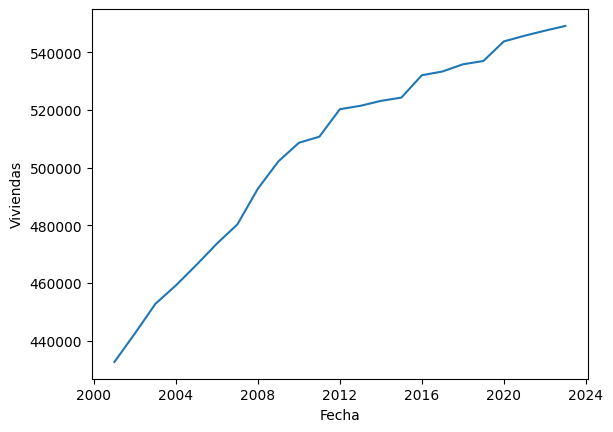

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
provincia="Zaragoza"
sns.lineplot(data = df_vivienda[df_vivienda["Provincia"] == provincia], x = "Fecha", y = "Viviendas", errorbar= None)


<Axes: xlabel='Fecha', ylabel='Viviendas_normalizado'>

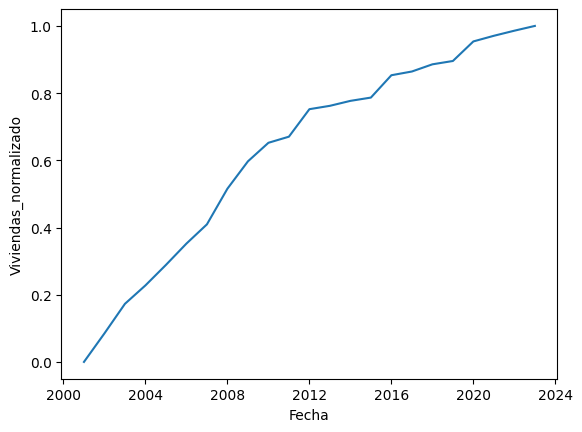

In [206]:
sns.lineplot(data = df_vivienda[df_vivienda["Provincia"] == provincia], x = "Fecha", y = "Viviendas_normalizado", errorbar= None)

In [207]:
df_vivienda.to_csv("./data/datasets_corregidos/csv_vivienda_corregido.csv", sep=";", header=True)